In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/xh/qjg6479d50q0rwvhnz1_49v00000gn/T/ipykernel_1564/1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
df = pd.read_csv("formattedData/08-15-2022.csv", nrows=100000)

In [14]:
df.head()

,Unnamed: 0,time,trade_id,price,amount,exchange,instrmnt,vol_dllr,sell2,Class,Asset,datetime,year,hour
0,0,1.660578e+12,000001a21142e31ed266f2281467cac01b759752ddfd4c...,0.29070,10.320000,bbox,ont-usdt,3.000024,0.0,spot,ont,2022-08-15 15:41:52.248999936,2022,15
1,1,1.660565e+12,0000045572b285d5c06ca47fde8cdbba688e57bd8e69bc...,0.00017,0.023600,bbox,qtum-btc,0.000004,0.0,spot,qtum,2022-08-15 11:57:16.963000064,2022,11
2,2,1.660546e+12,000006ee08295995ce6a0660705422c8be6d780ea7d64c...,8.63800,371.708000,bbox,link-usdt,3210.813704,1.0,spot,link,2022-08-15 06:38:44.241999872,2022,6
3,3,1.660551e+12,00000c04ff12bd00032c4ae5d9252898570c3808bf3257...,23964.00000,0.008345,bbox,btc-usdt,199.979580,1.0,spot,btc,2022-08-15 08:13:15.577999872,2022,8
4,4,1.660529e+12,00000cfe3ba1fa64e7621236b74ac94dfd76a11b747cab...,3.87650,0.515900,bbox,snx-usdt,1.999886,1.0,spot,snx,2022-08-15 02:02:28.702000128,2022,2


In [13]:
df.columns

Index(['Unnamed: 0', 'time', 'trade_id', 'price', 'amount', 'exchange',
       'instrmnt', 'vol_dllr', 'sell2', 'Class', 'Asset', 'datetime', 'year',
       'hour'],
      dtype='object')

In [6]:
df.exchange.value_counts()

exchange
bbox    100000
Name: count, dtype: int64

In [7]:
df.iloc[-1]

Unnamed: 0                                                99999
time                                            1660565567108.0
trade_id      0b088ff070e4f1cfe380f63553cabdf7beceba2332ec1f...
price                                                  57.38539
amount                                                   0.0774
exchange                                                   bbox
instrmnt                                               ksm-usdt
vol_dllr                                               4.441629
sell2                                                       1.0
Class                                                      spot
Asset                                                       ksm
datetime                          2022-08-15 12:12:47.108000000
year                                                       2022
hour                                                         12
Name: 99999, dtype: object

In [9]:
df_next_100000 = pd.read_csv("formattedData/08-15-2022.csv", skiprows=range(1,100000), nrows=100000)

In [12]:
df_next_100000.exchange.value_counts()

exchange
bbox    100000
Name: count, dtype: int64

In [41]:
important_colums = ['price', 'amount', 'exchange', 'vol_dllr', 'instrmnt','Asset', 'sell2', 'datetime']

In [42]:
key_data_df = pd.read_csv("formattedData/08-15-2022.csv", usecols=important_colums) # 9*10 seconds hopefully

In [43]:
key_data_df.head()

,price,amount,exchange,instrmnt,vol_dllr,sell2,Asset,datetime
0,0.29070,10.320000,bbox,ont-usdt,3.000024,0.0,ont,2022-08-15 15:41:52.248999936
1,0.00017,0.023600,bbox,qtum-btc,0.000004,0.0,qtum,2022-08-15 11:57:16.963000064
2,8.63800,371.708000,bbox,link-usdt,3210.813704,1.0,link,2022-08-15 06:38:44.241999872
3,23964.00000,0.008345,bbox,btc-usdt,199.979580,1.0,btc,2022-08-15 08:13:15.577999872
4,3.87650,0.515900,bbox,snx-usdt,1.999886,1.0,snx,2022-08-15 02:02:28.702000128


In [20]:
key_data_df.exchange.value_counts()

exchange
binc    29970400
bnce    22041534
huob     7832589
okex     5874344
kcon     5311254
cbse     3666350
bfrx     2486944
bbox     2319971
ftxx     2173028
bgon     2107210
upbt      994867
hitb      923029
krkn      861095
zbcn      718789
bthb      701995
cnex      687319
bfnx      555748
bnus      445602
gmni      205235
bequ      205163
btrk      171956
ftxu      167570
btrx      123829
bfly      113837
polo      109874
itbi       88986
cone       84370
stmp       83346
okcn       64702
btso       42759
quon       42540
cucy       34502
btcb       32086
cexi       30431
btba       25171
ccck       23796
korb       19211
yobt       15787
zaif        9728
oslx        1750
sxha        1597
trck        1583
eris        1404
cnmt         711
bndx         621
btmx         292
bl3p         231
Name: count, dtype: int64

In [84]:
key_data_df.sell2.value_counts()

sell2
0.0    46528353
1.0    44846783
Name: count, dtype: int64

In [148]:
all_binance_trades = key_data_df[(key_data_df.exchange == 'bnce')]

In [149]:
all_binance_trades.set_index('datetime', inplace=True)
all_binance_trades.count()

price       22041534
amount      22041534
exchange    22041534
instrmnt    22041534
vol_dllr    22041534
sell2       22041534
Asset       22041534
dtype: int64

<Axes: xlabel='datetime'>

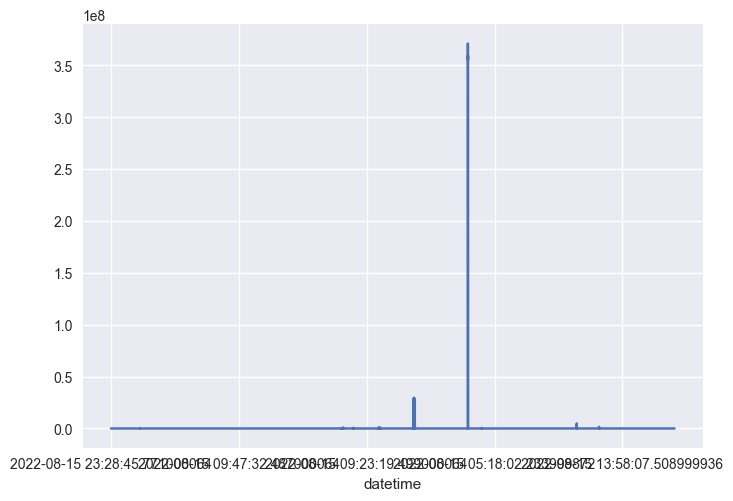

In [156]:
all_binance_trades.price.plot()

In [151]:
all_poloniex_trades = key_data_df[(key_data_df.exchange == 'polo')]
all_poloniex_trades.set_index('datetime', inplace=True)

,price,amount,exchange,instrmnt,vol_dllr,sell2,Asset
datetime,,,,,,,
2022-08-15 01:44:29.000000000,0.891000,15.2249,polo,1inch-usdt,13.565386,0.0,1inch
2022-08-15 23:02:50.000000000,0.000034,72.0000,polo,ava-btc,0.002475,0.0,ava
2022-08-15 21:56:49.000000000,0.000361,2.9000,polo,link-btc,0.001048,0.0,link
2022-08-15 21:56:53.000000000,0.000361,4.1000,polo,link-btc,0.001481,0.0,link
2022-08-15 21:57:02.000000000,0.000361,4.5000,polo,link-btc,0.001626,0.0,link


<Axes: xlabel='datetime'>

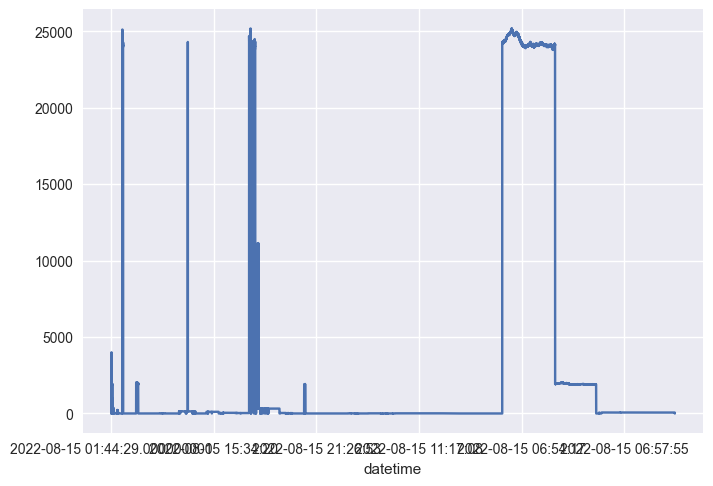

In [152]:
all_poloniex_trades.price.plot()

In [153]:
all_poloniex_trades.head()

,price,amount,exchange,instrmnt,vol_dllr,sell2,Asset
datetime,,,,,,,
2022-08-15 01:44:29.000000000,0.891000,15.2249,polo,1inch-usdt,13.565386,0.0,1inch
2022-08-15 23:02:50.000000000,0.000034,72.0000,polo,ava-btc,0.002475,0.0,ava
2022-08-15 21:56:49.000000000,0.000361,2.9000,polo,link-btc,0.001048,0.0,link
2022-08-15 21:56:53.000000000,0.000361,4.1000,polo,link-btc,0.001481,0.0,link
2022-08-15 21:57:02.000000000,0.000361,4.5000,polo,link-btc,0.001626,0.0,link


In [154]:
all_poloniex_trades.instrmnt.value_counts()

instrmnt
ltc-usdt      14300
btc-usdt      10298
dot-usdt       9751
trx-usdt       8365
eth-usdt       8005
              ...  
fsw-usdt          1
bond-usdt         1
agld-usdt         1
api3-usdt         1
stake-usdt        1
Name: count, Length: 136, dtype: int64

In [157]:
binance_trades_btc_ustd = all_binance_trades[all_binance_trades.instrmnt == 'btc-usdt']

In [ ]:
polinex_trades_btc_ustd = all_poloniex_trades[all_poloniex_trades.instrmnt == 'btc-usdt']

In [ ]:
print("Biannce Count")
print(binance_trades_btc_ustd.count())
print("Polinex Count")
print(polinex_trades_btc_ustd.count())

Biannce Count
price       13822059
amount      13822059
exchange    13822059
instrmnt    13822059
vol_dllr    13822059
sell2       13822059
Asset       13822059
dtype: int64
Polinex Count
price       10298
amount      10298
exchange    10298
instrmnt    10298
vol_dllr    10298
sell2       10298
Asset       10298
dtype: int64


In [159]:
binance_trades_btc_ustd.sort_index()
polinex_trades_btc_ustd.sort_index()

,price,amount,exchange,instrmnt,vol_dllr,sell2,Asset
datetime,,,,,,,
2022-08-15 00:00:59,24301.40,0.015575,polo,btc-usdt,378.494305,0.0,btc
2022-08-15 00:00:59,24301.40,0.000400,polo,btc-usdt,9.720560,0.0,btc
2022-08-15 00:01:07,24313.13,0.010722,polo,btc-usdt,260.685380,0.0,btc
2022-08-15 00:01:14,24295.51,0.005400,polo,btc-usdt,131.195754,0.0,btc
2022-08-15 00:02:56,24283.76,0.006800,polo,btc-usdt,165.129568,0.0,btc
...,...,...,...,...,...,...,...
2022-08-15 23:59:06,24102.42,0.008447,polo,btc-usdt,203.593142,0.0,btc
2022-08-15 23:59:07,24095.03,0.020000,polo,btc-usdt,481.900600,0.0,btc
2022-08-15 23:59:07,24095.03,0.005244,polo,btc-usdt,126.354337,0.0,btc


In [90]:
# Determine the start and end dates for df1
start_date_df1 = binance_trades_btc_ustd.index.min()
end_date_df1 = binance_trades_btc_ustd.index.max()

# Determine the start and end dates for df2
start_date_df2 = polinex_trades_btc_ustd.index.min()
end_date_df2 = polinex_trades_btc_ustd.index.max()

# Print the range of time covered by each DataFrame
print("binance_trades_btc_ustd 1: Start Date =", start_date_df1, ", End Date =", end_date_df1)
print("polinex_trades_btc_ustd 2: Start Date =", start_date_df2, ", End Date =", end_date_df2)

binance_trades_btc_ustd 1: Start Date = 2022-08-15 00:00:00.001999872 , End Date = 2022-08-15 23:59:59.998000128
polinex_trades_btc_ustd 2: Start Date = 2022-08-15 00:00:59 , End Date = 2022-08-15 23:59:40


In [163]:
# Convert the index to a DateTimeIndex
binance_trades_btc_ustd.index = pd.DatetimeIndex(binance_trades_btc_ustd.index)
polinex_trades_btc_ustd.index = pd.DatetimeIndex(polinex_trades_btc_ustd.index)

<Axes: xlabel='datetime'>

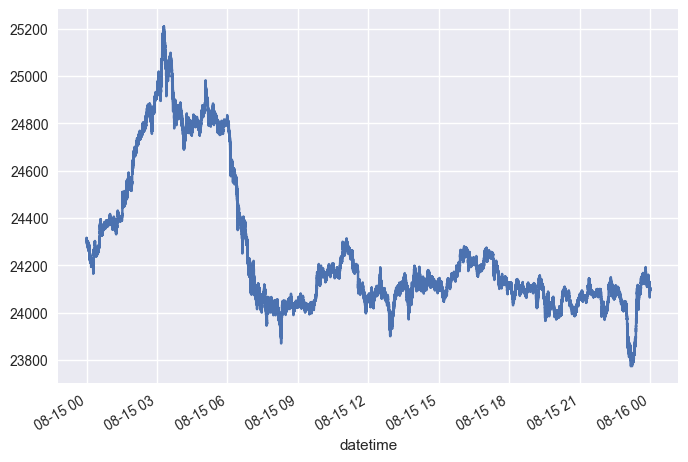

In [164]:
binance_trades_btc_ustd.price.plot()

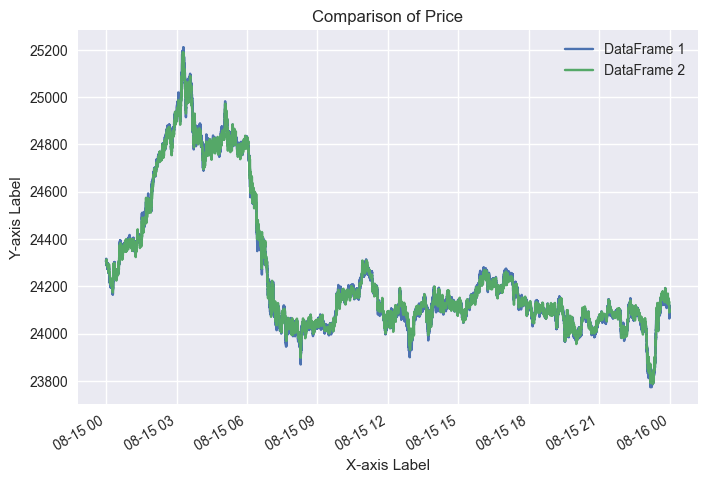

In [165]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plotting the 'price' column from df1
binance_trades_btc_ustd['price'].plot(ax=ax, label='DataFrame 1')

# Plotting the 'price' column from df2
polinex_trades_btc_ustd['price'].plot(ax=ax, label='DataFrame 2')

# Customize the plot
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Comparison of Price')
ax.legend()

# Display the plot
plt.show()